In [1]:
import pandas as pd
import numpy as np
import math 
import scipy.linalg as lin
import matplotlib.pyplot as plt

## Q1:

$$ min_{A,B} F(A,B) = \frac{1}{N} \sum_{n=1}^N ln (1+exp(-y_n(A * (w^T_{SVM}\phi(x_n) + b_{SVM}) + B))) $$

$$ = \frac{1}{N} \sum_{n=1}^N ln (1+exp(-y_n(A z_n + B))) $$



$$ \nabla F(A,B) = [\frac{1}{N} \sum_{n=1}^N \frac{exp(-y_n(Az_n + B))}{1+exp(-y_n(Az_n + B))} (-y_nz_n),\frac{1}{N} \sum_{n=1}^N \frac{exp(-y_n(Az_n + B))}{1+exp(-y_n(Az_n + B))} (-y_n)  ] $$

$$ = \frac{1}{N} \sum_{n=1}^N \frac{exp(-y_n(Az_n + B))}{1+exp(-y_n(Az_n + B))} [-y_nz_n,-y_n] $$

$$ = \frac{1}{N} \sum_{n=1}^N p_n [-y_nz_n,-y_n] $$

where $$ p_n = \theta(-y_n(Az_n + B)), z_n = w^T_{SVM} \phi(x_n) + b_{SVM} $$

## Q2: 

$$H(F) = \begin{pmatrix} \partial F(A,A) & \partial F(A,B) \\ 
\partial F(B,A)& \partial F(B,B) \end{pmatrix} $$

$$ H(F) = \begin{pmatrix} \frac{1}{N} \sum_{n=1}^N y_n^2 * z_n^2 * p_n * (1 - p_n) & \frac{1}{N} \sum_{n=1}^N y_n^2 * z_n * p_n * (1 - p_n)  \\ 
 \frac{1}{N} \sum_{n=1}^N y_n^2 *z_n * p_n * (1 - p_n) & \frac{1}{N} \sum_{n=1}^N y_n^2 * p_n * (1 - p_n)\end{pmatrix} $$ 

want to prove that H(F) is positive semi-definite. 

(i) all eigenvalues are > 0. 

(ii) all pivots are > 0.

(iii) all subdeterminants > 0.


since $p_n > 0$ and $1 - p_n > 0,\partial F(A,A) \ge 0 $$

$$ |H(F)｜ = \sum_{n=1}^N \sum_{m=1}^N y_n^2 y_m^2 z_nz_m(z_nz_m -1)p_n(1-p_n)p_m(1-p_m) $$

## Q3：

Kernel Matrix K = I. 

since $$ K(x_m,x_n|x_m = x_n) = 1, K(x_m,x_n|x_m \neq x_n) = 0 $$

For L2 regularized regression, 

$$ min \frac{\lambda}{N} \sum_{n=1}^N \sum_{m=1}^N \beta_n \beta_m K(x_m,x_n) + \frac{1}{N} \sum_{n=1}^N (y_n - \sum_{m=1} \beta_m K(x_m,x_n))^2 $$


$$ min \frac{\lambda}{N} \beta^T K \beta + \frac{1}{N} (\beta^T K^TK \beta - 2\beta^T K^T y + y^Ty )$$

$$ \nabla E(\beta) = \frac{2}{N}[\lambda K\beta + K^TK \beta - K^Ty] $$

$$ = \frac{2}{N}K^T [(\lambda I + K) \beta - y] $$

$$ = 0 $$

So 

$$ \beta = (\lambda I  + K)^{-1} y $$

$$ \beta = \frac{y}{\lambda + 1} $$


# Blending

## 之前的年份的作业

Inorder to cheat from the RMSEs,

$$ g = \widetilde{X}w_g = \widetilde y $$

where, $$ w_g = W * \alpha =  [w_1, w_2, .. ,w_T]* \begin{pmatrix} \alpha_1 \\ \alpha_2 \\ .. \\ \alpha_T \end{pmatrix}, g_t = \widetilde Xw_t $$

Hence, given any $ \widetilde y \in R^{\widetilde{N} * 1} $, exits $ \alpha $ s.t. $$\widetilde XW\alpha = \widetilde y,  \widetilde XW \in R^{\widetilde{N}*T} $$

So, $rank(\widetilde XW)$ must be $\widetilde{N}$ ,that is $ T \ge \widetilde{N}.$

Hence, the minimum number of queries is $\widetilde{N}$.

For any given hypothesis g

$$ RMSE(g) = (g - \widetilde y)^2 = g^Tg +  \widetilde y^T  \widetilde y - 2g^T  \widetilde y $$ 

Hence,

$$ 2g^T \widetilde y = RMSE(g) - g^Tg -  \widetilde y^T  \widetilde y  $$ 

If I can get another g' = 0, i will know 

$$  \widetilde y^T  \widetilde y = RMSE(0) $$ 

so $$ 2g^T \widetilde y = RMSE(g) - g^Tg - RMSE(0)  $$ 

Hence, the minimum number of queries is 2.

$$\widetilde XW\alpha = \widetilde y,  \widetilde XW \in R^{\widetilde{N}*T} $$

multiply $ \widetilde y^T $,
$$\widetilde y^T \widetilde XW\alpha = \widetilde y^T \widetilde y,  \widetilde XW \in R^{\widetilde{N}*T} $$


$$ \widetilde y^T \begin{pmatrix} g_1 & g_2 & ... & g_K \end{pmatrix} \begin{pmatrix} \alpha_1 \\ \alpha_2 \\ ... \\ \alpha_K \end{pmatrix} = \widetilde y^T \widetilde y $$

From Q9, if already know $ g_0 = 0, g_1,..,g_K $ and corresponding RMSE, we can know that 

$$ \begin{pmatrix} RMSE(g_1) - g_1^Tg_1 - RMSE(0) 
 &... & RMSE(g_K) - g_K^Tg_K - RMSE(0)  \end{pmatrix} \begin{pmatrix} \alpha_1 \\ \alpha_2 \\ ... \\ \alpha_K \end{pmatrix} = RMSE(0) $$
 
Only need K = 1(the minimum number of queries need is 2), can obtain the optimal weights. 

## Q4:


1. request size-2 Data $D_t$,
$$ D_t =  \begin{pmatrix} x_1^{[t]} & (x_1^{[t]})^2 \\ 
x_2^{[t]} & (x_2^{[t]})^2\end{pmatrix} $$ 

where $ x_1^{[t]},x_2^{[t]} \in [0,1] $, uniform distribution 

2. So $g_t$ is the linear model generated by $D_t$

$$ g_t(x) = \frac{(x_2^{[t]})^2- (x_1^{[t]})^2}{x_2^{[t]} - x_1^{[t]}}(x-x_1^{[t]}) + (x_1^{[t]})^2 $$

$$ = (x_2^{[t]} + x_1^{[t]})x- x_2^{[t]}x_1^{[t]} $$

3. $$ \bar{g(x)} =  lim_{T->\infty} \frac{1}{T} \sum_{t=1}^T g_t(x) $$

$$= lim_{T->\infty} \frac{1}{T} \sum_{t=1}^T (x_2^{[t]} + x_1^{[t]})x- x_2^{[t]}x_1^{[t]} $$

$$ = E((\frac{1}{2} + \frac{1}{2})x- x_2^{[t]}x_1^{[t]} ) $$
$$ = x - E(x_2^{[t]})E(x_1^{[t]} ) $$
$$ = x - \frac{1}{4} $$

所以最后的答案是x-1/4

# Boosting
## Q5,6
Recall the adaboost algorithm.

(1) $ u^{(1)} = [\frac{1}{N},\frac{1}{N},...,\frac{1}{N}] $

(2) obtain $g_1 $ by $A(D,u^{(1)}) $

(3) update $ g_2 $ 

$$u^{(2)}_{-} = u^{(1)} * \Diamond_1 $$

$$u^{(2)}_{+} = u^{(1)} / \Diamond_1 $$

where $ \Diamond_1 = \sqrt{\frac{1-\epsilon_1}{\epsilon_1}}, \epsilon_1 = \frac{\sum_{n=1}^N u_{n}^{(1)} [[y_n \neq g_1(x_n)]] }{\sum_{n=1}^N u_{n}^{(1)}} $

now,$ g_1(x) = 1 $ in the first iteration

$ \epsilon_t = 0.13, $ then, $ \Diamond_1 = 2.59 $

so 

$$ u^{(2)}_{-} = \frac{1}{N} * 2.59, u^{(2)}_{+} = \frac{1}{N} / 2.59 $$ 

$$ \frac{u^{(2)}_{+}}{u^{(2)}_{-}} = \frac{1}{\Diamond_1^2} = \frac{\epsilon_1}{1-\epsilon_1}= 0.15 $$

# Kernel for Decision Stumps

$g = \hat{g} $ if and only if $\forall x, g(x) = \hat{g(x)} $ 

这道题里, L = -M, R = M. 

对于每一维来说不同的stump的个数为2*(R-L+1)。

但是多维下不能直接每一维结果乘以维数d，因为每一维里都包含了全正或者全负的分类，是有重复的（因为即使x $ \neq $ x', 全正or负的分类会将他们全预测为正or负）。如果每一维里去掉全正全负两类，那么就有2*(R-L)个，再乘以维度d，最后加上全正全负两个，则结果是 2d (R-L) + 2 


## Q7:
in the case of d = 2 and M = 5, the number of decision stumps is 42

## Q8:
$$ \phi_{ds}(x) = (g_1(x),g_2(x),..,g_{|2d(R-L)+2|}(x)) $$

$$ = (sign(x_1 - (L + 1)),-sign(x_1 - (L + 1)),...,sign(x_1 - R),-sign(x_1 - R),sign(x_2 - (L + 1)),...,sign(x_n - R),-sign(x_n - R), sign(x_1 - L),-sign(x_1 - L) ) $$




$$ K_{ds}(x,x') = (\phi_{ds}(x))^T (\phi_{ds}(x)) $$

$$ =2 *[sign(x_1 - (L+1))sign(x_1' - (L+1)) + .. + sign(x_1 - R)sign(x_1' - R) + sign(x_n - R)sign(x_n'-R) + sign(x_1 - L)sign(x_1'-L)] $$

由Q7得，括号里的term的个数是d(R-L) + 1. 

对于$x_i,x_i'$来说，如果它们都小于L+1,或者都大于L+1,则乘积是1,则括号里的和是d(R-L)+1; 只有当$ L+1 \in [min(x_i,x_i'),max(x_i,x_i')] $, 乘积是-1.

所以式子 $= 2[d(R-L)+1 - 2|(x,x')|_1] = 2d(R-L) - 4|(x,x')|_1 + 2$

# Experiment with Kernel Ridge Regression

The object function of the kernel ridge regression:

$$ E_{aug}(\beta) = \frac{\lambda}{N} \beta^T K \beta + \frac{1}{N} (\beta^T K^T K \beta - 2\beta^T K^T y + y^Ty)，
K = exp(-\gamma ||x-x'||^2) $$

Since,

$$ \nabla  E_{aug}(\beta) =  \frac{2}{N} K^T [(\lambda I +K) \beta - y ] = 0 $$

$$ \beta = (\lambda I +K)^{-1} y, \ w = Z^T * \beta $$

Hence,

$$ y_{predict} = Z * w = ZZ^T \beta = K(X,X) * \beta $$

$$ y\_test_{predict} = K(\widetilde X, X) * \beta $$


In [21]:


def data_form(path,bias=False):
    D = np.loadtxt(path)
    D_test = D[400:]
    D = D[:400]
    
    X = D[:,:-1].astype('float') # 一定要是float格式才可以
    if bias: X = np.c_[np.ones(X.shape[0]),X]
    y = D[:,-1].copy().reshape(-1,1)
    X_test = D_test[:,:-1].astype('float') # 一定要是float格式才可以
    if bias: X_test = np.c_[np.ones(X_test.shape[0]),X_test]
    y_test = D_test[:,-1].copy().reshape(-1,1)
    
    return X,y,X_test,y_test

def compute_Kernel(X_,X,gamma,kernel=False):
    M = X_.shape[0]
    N = X.shape[0]
    K = np.zeros((M,N))
    
    if kernel:
        for i in range(M):
            for j in range(N):
                K[i][j] = math.exp(-gamma * np.sum((X_[i] - X[j]) ** 2))            
        return np.mat(K)
    else:
        return np.mat(X_) * np.mat(X).T
        
def fit_Kernel(X,y,lamda,gamma,kernel=False):
    N = X.shape[0]
    K = compute_Kernel(X,X,gamma,kernel)
    beta = lin.pinv(lamda * np.eye(N) + K) * np.mat(y)
    return beta


In [22]:
X,y,X_test,y_test = data_form('技法hw2_lssvm_all.dat.txt')

gamma_lst = [32, 2, 0.125]
lamda_lst = [0.001, 1, 1000]
e_in = pd.DataFrame(columns=lamda_lst,index=gamma_lst)
e_out = pd.DataFrame(columns=lamda_lst,index=gamma_lst)
for gamma in gamma_lst:
    K = compute_Kernel(X,X,gamma,True)
    K2 = compute_Kernel(X_test,X,gamma,True)
    for lamda in lamda_lst:
        beta = fit_Kernel(X,y,lamda,gamma,True)
        
        y_predict = K * beta
        y_test_predict = K2 * beta
        
        e_in.loc[gamma,lamda] = np.mean(np.sign(y_predict) != y)        
        e_out.loc[gamma,lamda] = np.mean(np.sign(y_test_predict) != y_test)

print('the minimum e_in is',np.min(np.min(e_in,axis=0)))
print('the minimum e_out is',np.min(np.min(e_out,axis=0)))

the minimum e_in is 0.0
the minimum e_out is 0.39


# Experiment with Bagging Ridge Regression
## Q9,10

这道题里，没有了kernel，其实相当于

$$K(\widetilde X, X) = \widetilde X^T *  X $$

In [41]:
X,y,X_test,y_test = data_form('技法hw2_lssvm_all.dat.txt',bias=True)

lamda_lst = [0.05, 0.5, 5,50, 500]
e_in = np.zeros(len(lamda_lst))
e_out = np.zeros(len(lamda_lst))

i = 0
for lamda in lamda_lst:
    K = compute_Kernel(X,X,0,False)
    K2 = compute_Kernel(X_test,X,0,False)
    
    beta = fit_Kernel(X,y,lamda,0,False)
    
    y_predict = K * beta
    y_test_predict = K2 * beta

    e_in[i] = np.mean(np.sign(y_predict) != y)        
    e_out[i] = np.mean(np.sign(y_test_predict) != y_test)
    
    i += 1

# out = np.c_[lamda_lst,e_in,e_out].astype(str)
print('the minimum e_in is',np.min(e_in),'the lamda is',lamda_lst[np.argmin(e_in)])
print('the minimum e_out is',np.min(e_out),'the lamda is',lamda_lst[np.argmin(e_out)])

the minimum e_in is 0.315 the lamda is 50
the minimum e_out is 0.36 the lamda is 0.05


## Q11,12 bagging with voting

In [42]:
def bootstrap(X,y):
    N = X.shape[0]
    boot_lst = []
    for i in range(len(X)):
        boot_lst.append(int(np.floor(np.random.random()*N)))
    now_X = X[boot_lst]
    now_y = y[boot_lst]
    return now_X,now_y

this diversity is constructed by data randomness. 

In [43]:
X,y,X_test,y_test = data_form('技法hw2_lssvm_all.dat.txt',bias=True)
lamda_lst = [0.05, 0.5, 5,50, 500]
e_in = []
e_out = []

for lamda in lamda_lst:
    y_predict_sum = np.zeros((len(y),1))
    y_predict_test_sum = np.zeros((len(y_test),1))
    
    for iter in range(250):
        # bagging的精髓是bootstrapping:
        # 做250次bootstrapping，即有250个g
        now_X,now_y = bootstrap(X,y)

        # 使用新资料来训练底层的lssvm, beta可以看作是一个g
        beta = fit_Kernel(now_X,now_y,lamda,0,False) 
        
        # note that each linear LSSVM should take the sign operation before aggregation
        # 虽然用now_X训练，但是最后fit in sample data的时候
        K = compute_Kernel(X,now_X,0,False)
        y_predict = np.sign(K * beta)
        K2 = compute_Kernel(X_test,now_X,0,False)
        y_predict_test = np.sign(K2 * beta) 
        
        y_predict_sum += y_predict
        y_predict_test_sum += y_predict_test
       
    
    # 如果是linear aggregation, 需要在训练集上训练，但是这里是uniform voting，不需要训练
    # bagging with unifrom aggregation
    y_predict = y_predict_sum / 250
    y_predict_test = y_predict_test_sum / 250 
    
    e_in.append(np.mean(np.sign(y_predict) != y))
    e_out.append(np.mean(np.sign(y_predict_test) != y_test))

In [44]:
print('the minimum e_in is',np.min(e_in),'the lamda is',lamda_lst[np.argmin(e_in)])
print('the minimum e_out is',np.min(e_out),'the lamda is',lamda_lst[np.argmin(e_out)])

the minimum e_in is 0.315 the lamda is 0.5
the minimum e_out is 0.36 the lamda is 0.05


# Experiments with Adaptive Boosting
## AdaBoost-Stump algorithm

In [25]:
def data_form(path,bias=False):
    D = np.loadtxt(path)

    X = D[:,:-1].astype('float') # 一定要是float格式才可以
    if bias: X = np.c_[np.ones(X.shape[0]),X]
    y = D[:,-1].copy()

    return X,y

def get_error(x,y,weights,theta,s):
    # s * sign(x-theta)
    sum_ = 0
    
    y_predict = s * np.sign(x - theta)
    for i in range(len(y)):
        if y_predict[i] != y[i]:
            sum_ += weights[i] 
            
    err = sum_/np.sum(weights)
    return err

def decision_stump_1d(x,y,weights):
    # 一维decision stump算法，对x_i, 遍历theta 和 s，找出最优
    
    # x.shape = N,1
    
    N,d = X.shape
    
    min_err = 1
    best_s = 0
    best_theta = 0
    best_dim = -1
    

    thetas = (x[:-1] + x[1:])/2
        
    for s in [1,-1]:
        for theta in thetas: 
            err = get_error(x,y,weights,theta,s)

            if err < min_err: 
                min_err = err
                best_s = s
                best_theta = theta

    return [min_err,best_s,best_theta]

def decision_stump(X,y,weights):
    # 遍历每一维最优的s和theta，选出最优
    
    min_err = 1
    best_s = 0
    best_theta = 0
    best_dim = -1
    
    for dim in range(X.shape[1]):
        x = X[:,dim]
        [err,s,theta] = decision_stump_1d(x,y,weights)
        
        if err < min_err:
            min_err = err
            best_s = s
            best_theta = theta
            best_dim = dim
            
    return [min_err,best_s,best_theta,best_dim]

def update_alpha(err):
    # 记录每个model的alpha，即最终blending时候的权重
    diamond = np.sqrt((1-err)/err)
    alpha = np.log(diamond)
    
    return alpha 

def update_weights(best_s,best_theta,x,y,weights,err):
    # 放大错误
    new_weights = weights.copy()
    
    diamond = np.sqrt((1-err)/err)
    # incorrect * diamond 
    # correct / diamond 
    y_predict = best_s * np.sign(x - best_theta)
    assert(y_predict.shape == y.shape)
    
    tmp = (y_predict != y)
    new_weights[tmp] = weights[tmp] * diamond 
    new_weights[~tmp] = weights[~tmp] / diamond 
    
    return new_weights

def adaboost_stump(X,y,T):
    N,d = X.shape

    err_lst = np.zeros((T))
    best_s_lst = np.zeros((T))
    best_theta_lst = np.zeros((T))
    best_dim_lst = np.zeros((T))
    alpha_lst = np.zeros((T))
    weights_lst = np.zeros((T))
    
    weights = np.ones((N)) / N  # 初始化,uniform voting

    for i in range(T):
        # 第一个model
        [err, best_s, best_theta, best_dim] = decision_stump(X,y,weights)
        alpha = update_alpha(err)
        
        # 记录model 
        err_lst[i] = err
        best_s_lst[i] = best_s
        best_theta_lst[i] = best_theta
        best_dim_lst[i] = best_dim
        alpha_lst[i] = alpha 
        weights_lst[i] = np.sum(weights)
        
        # 放大错误
        weights = update_weights(best_s,best_theta,X[:,best_dim],y,weights,err)
        
    model = np.c_[err_lst,best_s_lst,best_theta_lst,best_dim_lst,weights_lst,alpha_lst] 
    model = pd.DataFrame(model)
    model.columns = ['err','best_s','best_theta','best_dim','weights_sum','alpha'] 
    
    return model 

def bagging_fit(model,X):
    """
    model: dataframe with columns ['err','best_s','best_theta','best_dim','weights_sum','alpha'] 
    returns:
    y_predict 
    """
    iter_ = model.shape[0]
    sum_ = np.zeros((X.shape[0]))
    
    for i in range(iter_):
        now_model = model.iloc[i]
        now_dim = int(now_model['best_dim'])
        now_s = now_model['best_s']
        now_theta = now_model['best_theta']
        now_alpha = now_model['alpha']
        
        sum_ += now_alpha * now_s * np.sign(X[:,now_dim] - now_theta)
        
    y_predict = np.sign(sum_ / np.sum(model['alpha']))
    return y_predict


In [26]:
X,y = data_form('hw2_adaboost_train.dat.txt',bias=False)
X_test,y_test = data_form('hw2_adaboost_test.dat.txt',bias=False)

T = 300
model = adaboost_stump(X,y,T)

## Q13:

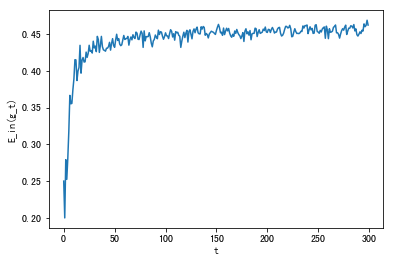

In [27]:
plt.plot(model['err'])
plt.xlabel('t')
plt.ylabel('E_in(g_t)')
plt.show()

## Q14:
e_in(G) is decreasing,a nd e_in(G_T) is 0.

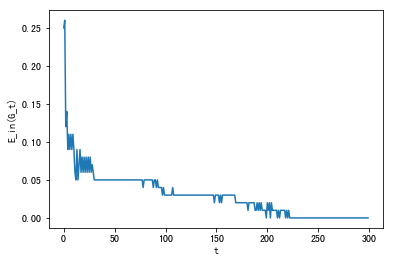

In [28]:
e_in_G = []
for iter_ in range(1,T+1):
    y_predict = bagging_fit(model[:iter_],X)
    e_in_G.append(np.mean(y_predict != y))

plt.plot(e_in_G)
plt.xlabel('t')
plt.ylabel('E_in(G_t)')
plt.show()

## Q15:
$ U_t $ is decreasing, $ U_T $ is  0.07.

This is because the number of incorrect dp is samller than that of correct dp. So gradually, the weights sum decreases.

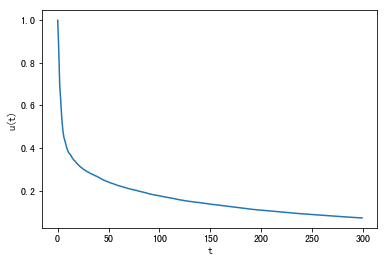

In [29]:
plt.plot(model['weights_sum'])
plt.xlabel('t')
plt.ylabel('u(t)')
plt.show()

## Q16:

$ E_out(G_t) $ 先下降后上升.

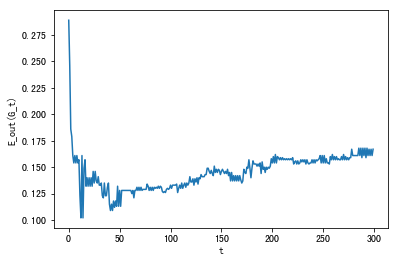

In [30]:
e_out_G = []
for iter_ in range(1,T+1):
    y_predict_test = bagging_fit(model[:iter_],X_test)
    e_out_G.append(np.mean(y_predict_test != y_test))

plt.plot(e_out_G)
plt.xlabel('t')
plt.ylabel('E_out(G_t)')
plt.show()

In [ ]:
5 hao